In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display_data_and_boundary(x,y,pred_fn):  
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    k = int(max(y)) + 1
    cols = ['ro', 'k^', 'b*','gx']
    for label in range(k):
        plt.plot(x[(y==label),0], x[(y==label),1], cols[label%4], markersize=8)
        
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([pred_fn(pt) for pt in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=k)
    plt.show()

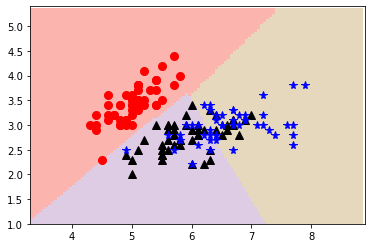

In [3]:
# Load IRIS data
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.svm import SVC
x = iris.data
y = iris.target

# Chọn ra 2 features để dễ vẽ hình
features = [0,1]
x = x[:,features]

# Train SVM với kernel linear
clf = SVC(C = 1,kernel="linear")
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

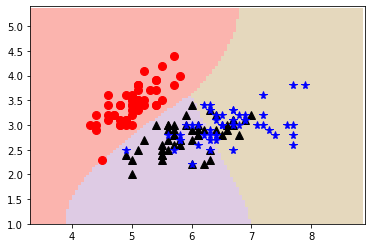

In [4]:
#Sử dụng kernel rbf, với gamma nhỏ ta thấy miền quyết định rộng hơn
from sklearn import svm
clf = svm.SVC(C = 1, kernel="rbf",gamma=0.5)
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

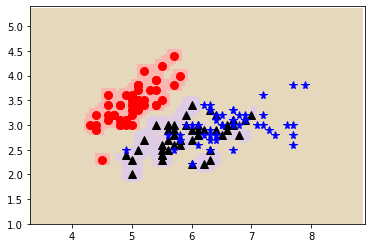

In [5]:
#Sử dụng kernel rbf với gamma lớn, ta có thể thấy các miền quyết định gần như fit vào các điểm dữ liệu
clf = svm.SVC(C = 1, kernel="rbf",gamma=100)
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

### 1.Thử chạy SVM trên 2 files data_3.txt và data_4.txt với C=[0.1, 1.0, 10.0, 100.0]


In [6]:
data = np.loadtxt("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_3.txt")
# Tạo training set x và label y
x = data[:,0:2]
y = data[:,2]

In [12]:
data

array([[ 1.,  1.,  0.],
       [ 1.,  2.,  0.],
       [ 1.,  3.,  0.],
       [ 2.,  1.,  0.],
       [ 2.,  2.,  0.],
       [ 2.,  3.,  0.],
       [ 3.,  1.,  0.],
       [ 3.,  2.,  0.],
       [ 3.,  3.,  0.],
       [ 4.,  1.,  0.],
       [ 4.,  2.,  0.],
       [ 4.,  3.,  0.],
       [ 1.,  6.,  1.],
       [ 1.,  7.,  1.],
       [ 1.,  8.,  1.],
       [ 1.,  9.,  1.],
       [ 1., 10.,  1.],
       [ 2.,  7.,  1.],
       [ 2.,  8.,  1.],
       [ 2.,  9.,  1.],
       [ 2., 10.,  1.],
       [ 3.,  8.,  1.],
       [ 3.,  9.,  1.],
       [ 3., 10.,  1.],
       [ 4.,  9.,  1.],
       [ 4., 10.,  1.],
       [ 5., 10.,  1.],
       [ 8.,  1.,  2.],
       [ 8.,  2.,  2.],
       [ 8.,  3.,  2.],
       [ 9.,  1.,  2.],
       [ 9.,  2.,  2.],
       [ 9.,  3.,  2.],
       [10.,  1.,  2.],
       [10.,  2.,  2.],
       [10.,  3.,  2.],
       [ 7.,  8.,  3.],
       [ 7.,  9.,  3.],
       [ 7., 10.,  3.],
       [ 8.,  8.,  3.],
       [ 8.,  9.,  3.],
       [ 8., 10.

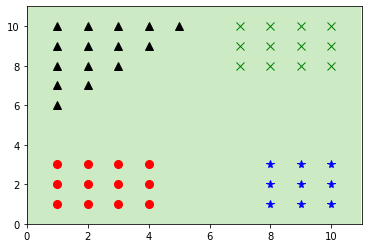

In [7]:
clf = svm.SVC(C = 0.1, kernel="rbf",gamma=0.5)
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

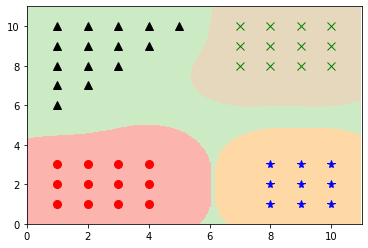

In [8]:
clf = svm.SVC(C = 1, kernel="rbf",gamma=0.5)
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

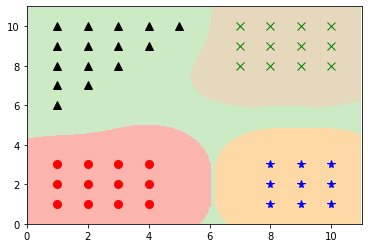

In [9]:
clf = svm.SVC(C = 10, kernel="rbf",gamma=0.5)
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

In [ ]:
clf = svm.SVC(C = 100, kernel="rbf",gamma=0.5)
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

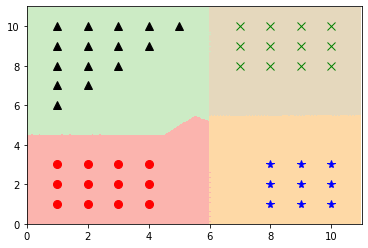

In [11]:
# Train SVM với kernel linear
clf = SVC(C = 1,kernel="linear")
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

### Với từng $C$ khác nhau thì ta nhận thấy
- $C$ là một tham số cho biết mức độ tốt ưu hoá của thuật toán SVM mà ta muốn để phân loại. 
- Đối với các giá trị lớn của $C$ thì biên sẽ nhỏ hơn nên sẽ tối ưu hoá  hơn trong việc huấn luyện. 
- Ngược lại, $C$ nhỏ thì biên sẽ lớn hơn nên có khả năng sẽ có nhiều điểm bị phân loại sai hơn. 
- Đối với cái giá trị rất nhỏ của $C$ thì sẽ rất dễ bị phân loại sai
- Ta không có bất cứ quy tắc cụ thể nào để chọn giá trị cho tham số $C$ mà phải tuỳ vào data. Ta phải thử dần các giá trị khàc nhau để tìm xem dâu là giá trị có độ sai lệch thấp nhất

### Lợi và hại khi tăng $gamma$ và giảm $gamma$

- $gamma$ là một hyperparameter mà ta đã cài đặt trước khi train model. Model của chúng ta rất nhạy cảm với tham số $gamma$. 
- Nếu gamma quá lớn, bán kính của vùng bị ảnh hưởng của vector support chỉ có vector support và giá trị chính quy của C để chống lại overfitting
- Còn nếu gamma quá nhỏ, mô hình sẽ bị quá hạn chế và không thể nắm bắt được độ phức tạp hay hình dạng của data. Vùng ảnh hưởng của bất kỳ support vector nào được chọn sẽ bào gồm tập train. Kết quả của model sẽ hoạt động tương tự một mô hình tuyến tính với tập hợp các siêu phẳng được phân tách các tâm có mật đô cao của bất kỳ 2 cặp lớp nào